## Polynomial Regression

When there is no linear relationship between dependant and independent features, polynomial regression can be helpful.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# quadratic equation used: y = 0.5x^2 + 1.5x + 2 + outliers
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.rand(100,1)

Text(0, 0.5, 't')

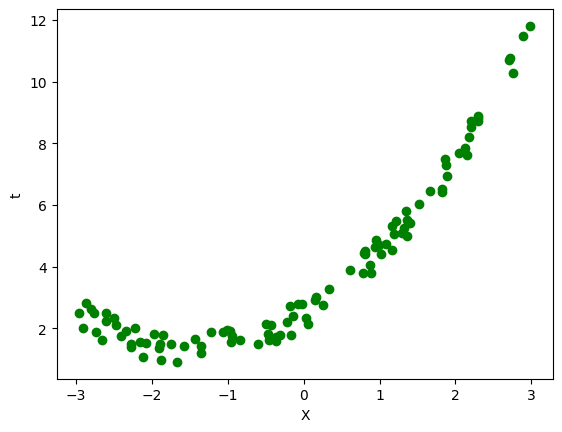

In [9]:
plt.scatter(X,y,color = 'g')
plt.xlabel("X")
plt.ylabel("t")

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 21)

In [11]:
# Implementing simple linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [18]:
from sklearn.metrics import r2_score
y_pred = regression.predict(X_test)
r2 = r2_score(y_true= y_test, y_pred= y_pred)

In [19]:
print(r2)

0.7231242022685637


Text(0, 0.5, 'y')

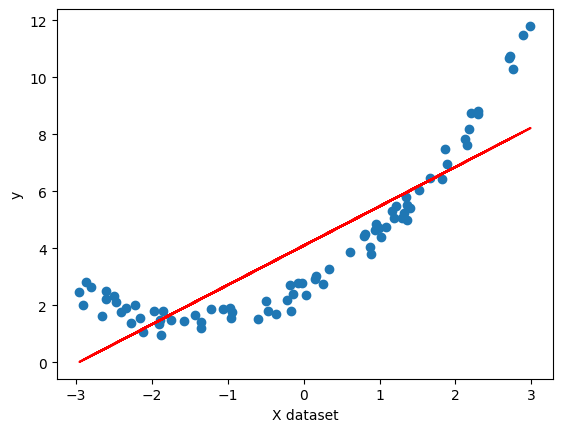

In [15]:
# visulaize the model
plt.plot(X_train, regression.predict(X_train), color = 'r')
plt.scatter(X_train, y_train)
plt.xlabel("X dataset")
plt.ylabel("y")

### Polynomial transformation

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly =  PolynomialFeatures(degree =2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [23]:
X_train_poly

array([[ 1.00000000e+00, -1.88529672e+00,  3.55434372e+00],
       [ 1.00000000e+00,  6.10854927e-01,  3.73143742e-01],
       [ 1.00000000e+00, -2.65661357e+00,  7.05759569e+00],
       [ 1.00000000e+00,  8.02053211e-01,  6.43289353e-01],
       [ 1.00000000e+00, -9.62666867e-01,  9.26727497e-01],
       [ 1.00000000e+00, -2.61076666e+00,  6.81610253e+00],
       [ 1.00000000e+00, -1.58233391e+00,  2.50378059e+00],
       [ 1.00000000e+00, -1.45989587e-01,  2.13129594e-02],
       [ 1.00000000e+00,  1.16606877e+00,  1.35971638e+00],
       [ 1.00000000e+00,  8.92836918e-01,  7.97157762e-01],
       [ 1.00000000e+00, -5.00780561e-01,  2.50781170e-01],
       [ 1.00000000e+00,  1.29691444e+00,  1.68198706e+00],
       [ 1.00000000e+00, -9.51267975e-01,  9.04910761e-01],
       [ 1.00000000e+00,  2.72166153e+00,  7.40744150e+00],
       [ 1.00000000e+00,  9.42764046e-01,  8.88804046e-01],
       [ 1.00000000e+00, -1.05736749e+00,  1.11802601e+00],
       [ 1.00000000e+00, -2.60915890e+00

In [24]:
regression2 = LinearRegression(n_jobs=-1)
regression2.fit(X_train_poly, y_train)
y_pred = regression2.predict(X_test_poly)
r2 = r2_score(y_true= y_test, y_pred= y_pred)

In [25]:
print(r2)

0.9835537410859873


In [26]:
regression2.coef_

array([[0.        , 1.51083484, 0.51064063]])

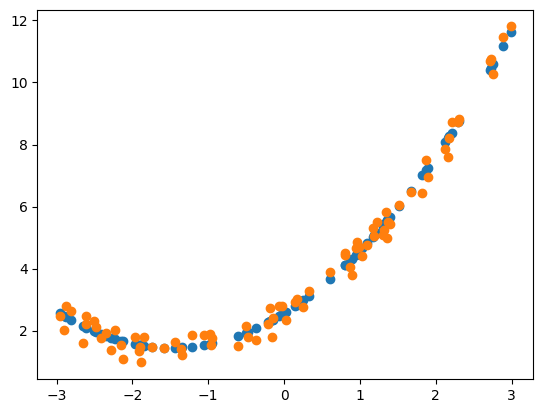

In [29]:
plt.scatter(X_train, regression2.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [30]:
# Prediction for new dataset
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)

In [31]:
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

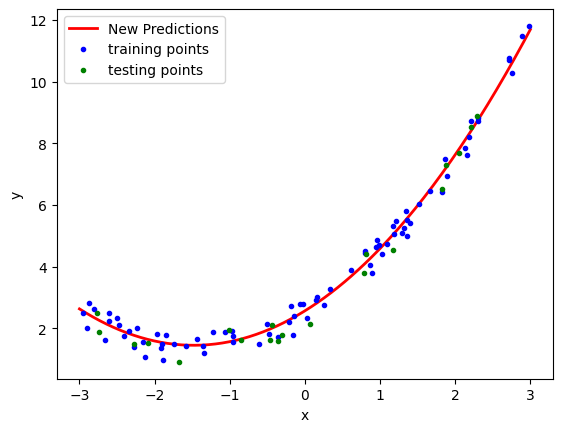

In [ ]:
y_new = regression2.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-' , linewidth = 2, label = "New Predictions")
plt.plot(X_train, y_train, 'b.', label = "Training Points")
plt.plot(X_test, y_test, "g." , label = "Testing Points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()